In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pysr import PySRRegressor
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Load the dataset
data = pd.read_csv("Wind_data/Location1.csv")

# Display the first few rows
data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [23]:
# Select relevant features based on domain knowledge
features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']
target = 'Power'

# Handle missing values (if any)
data = data.dropna(subset=features + [target])

# Select the last 1000 data points
data = data.tail(1000)

# Normalize features and target for better numerical performance
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(data[features])
y_scaled = scaler_y.fit_transform(data[[target]]).flatten()

In [24]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [25]:
# Initialize the symbolic regression model
model = PySRRegressor(
    niterations=50,
    binary_operators=["+", "-", "*", "/", "pow"],
    unary_operators=["sin", "cos", "exp", "log", "abs"],
    extra_sympy_mappings={"pow": lambda x, y: x**y},
    loss="loss(x, y) = (x - y)^2",
    populations=20,
    verbosity=1
)

# Train the model
model.fit(X_train, y_train)

[ Info: Started!



Expressions evaluated per second: 5.950e+04
Progress: 348 / 1000 total iterations (34.800%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.509e-02  1.594e+01  y = 0.51977
2           7.742e-02  2.055e-01  y = abs(x₄)
3           5.359e-02  3.679e-01  y = x₄ ^ 0.63826
4           4.543e-02  1.651e-01  y = sin(x₄ + x₇)
5           4.263e-02  6.362e-02  y = sin(x₄ * exp(x₄))
6           4.180e-02  1.966e-02  y = sin(x₄ * 2.401) + -0.187
7           3.642e-02  1.378e-01  y = sin(x₄ * (exp(x₀) + x₇))
8           3.639e-02  9.221e-04  y = abs(sin((exp(x₀) + x₇) * x₄))
10          3.494e-02  2.034e-02  y = sin((x₀ + (x₃ * 2.1502)) * (x₄ + 0.21226))
11          3.452e-02  1.197e-02  y = abs(sin((x₄ + 0.21226) * ((x₃ * 2.1502) + x₀)))
13          3.407e-02  6.561e-03  y = (x₄ + 0.2844) 

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.51977193   
	1         0.205542                                            abs(x4)   
	2         0.367876                                      x4 ^ 0.638264   
	3   >>>>  0.165130                                       sin(x4 + x7)   
	4         0.063616                                  sin(x4 * exp(x4))   
	5         0.103999                 sin((x4 / 0.50006443) ^ 1.6757787)   
	6         0.053428                           sin(x4 * (exp(x0) + x7))   
	7         0.005983            sin(x3 * 3.1747844) * (x4 + 0.29881725)   
	8         0.011066               sin(x4 * (exp(x0) + x7)) / 1.0465688   
	9         0.044270     (x4 + 0.29614556) * sin((x7 * 2.8175895) + x0)   
	10        0.015310  abs((x4 + 0.29614556) * sin(x0 + (x7 * 2.81758...   
	11        0.006635  ((x4 + 0.34374008) * abs(sin(x0 + (x7 * 2.8338...   
	12        0.005645  sin((x0 / 1.2734442) + ((x3 * 2.801057) + -0.1...   
	13        0.006694  (x4 + 0.3157888) * sin((x0 / 1.2734442) + abs(...   
	14        0.000712  abs((x4 + 0.3157888) * sin((x0 / 1.2734442) + ...   
	
	        loss  complexity  
	0   0.095089           1  
	1   0.077422           2  
	2   0.053592           3  
	3   0.045434           4  
	4   0.042634           5  
	5   0.038423           6  
	6   0.036424           7  
	7   0.036207           8  
	8   0.035808           9  
	9   0.034258          10  
	10  0.033737          11  
	11  0.033292          13  
	12  0.033105          14  
	13  0.032884          15  
	14  0.032861          16  
]

  - outputs/20250427_124506_XnpyPW/hall_of_fame.csv


In [26]:
# Display the discovered equations
print(model.equations_)

    complexity      loss                                           equation  \
0            1  0.095089                                         0.51977193   
1            2  0.077422                                            abs(x4)   
2            3  0.053592                                      x4 ^ 0.638264   
3            4  0.045434                                       sin(x4 + x7)   
4            5  0.042634                                  sin(x4 * exp(x4))   
5            6  0.038423                 sin((x4 / 0.50006443) ^ 1.6757787)   
6            7  0.036424                           sin(x4 * (exp(x0) + x7))   
7            8  0.036207            sin(x3 * 3.1747844) * (x4 + 0.29881725)   
8            9  0.035808               sin(x4 * (exp(x0) + x7)) / 1.0465688   
9           10  0.034258     (x4 + 0.29614556) * sin((x7 * 2.8175895) + x0)   
10          11  0.033737  abs((x4 + 0.29614556) * sin(x0 + (x7 * 2.81758...   
11          13  0.033292  ((x4 + 0.34374008) * abs(s

In [27]:
# Retrieve best symbolic equation
best_eq = model.get_best()
print("Best equation found:")
print(best_eq)

# Predict with the best equation
y_pred_scaled = model.predict(X_test)

# Rescale predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

Best equation found:
complexity                                   4
loss                                  0.045434
equation                          sin(x4 + x7)
score                                  0.16513
sympy_format                      sin(x4 + x7)
lambda_format    PySRFunction(X=>sin(x4 + x7))
Name: 3, dtype: object


RMSE: 0.1983
MAE: 0.1649


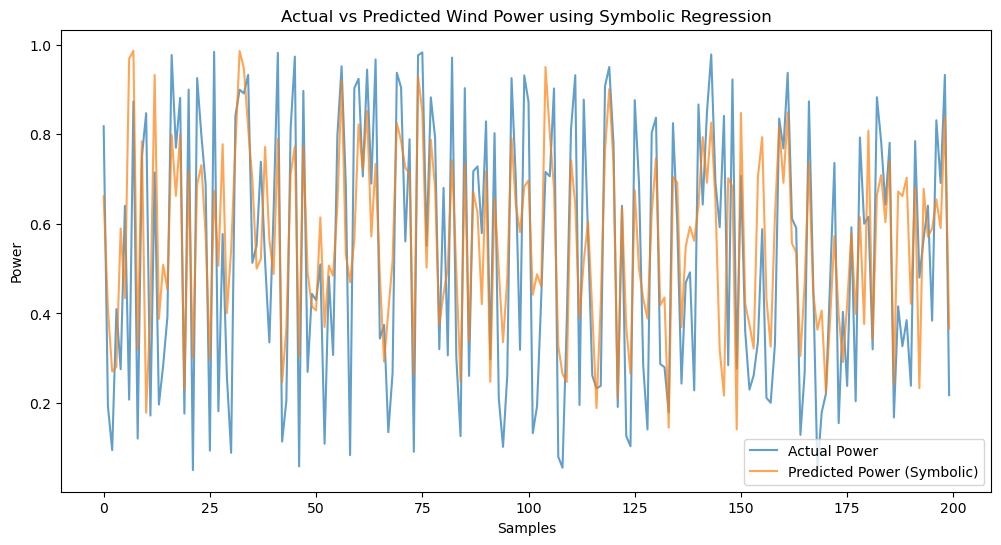

In [28]:
# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot Actual vs Predicted Power
plt.figure(figsize=(12, 6))
plt.plot(y_true, label="Actual Power", alpha=0.7)
plt.plot(y_pred, label="Predicted Power (Symbolic)", alpha=0.7)
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Power')
plt.title('Actual vs Predicted Wind Power using Symbolic Regression')
plt.show()